# UTP PPM 2024

---



# Naive Bayes Classifier

Tuliskan Nama, NIM, dan kelas Anda:

Nama : Rayhan Egar Sadtya Nugraha

NIM : 225150201111014

Kelas : PPM-D

# Data Loading dan Data Inspection

## Data Loading

In [51]:
# from google.colab import files

# files.upload()

In [52]:
# Baca data menggunakan Pandas

import pandas as pd

df = pd.read_csv('churn_cleaned.csv')

## Data Inspection

In [53]:
df.iloc[:10, :-10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes
1,Male,0,No,No,34,Yes,No,DSL,Yes,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes


In [54]:
df.iloc[:10, 10:]

,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


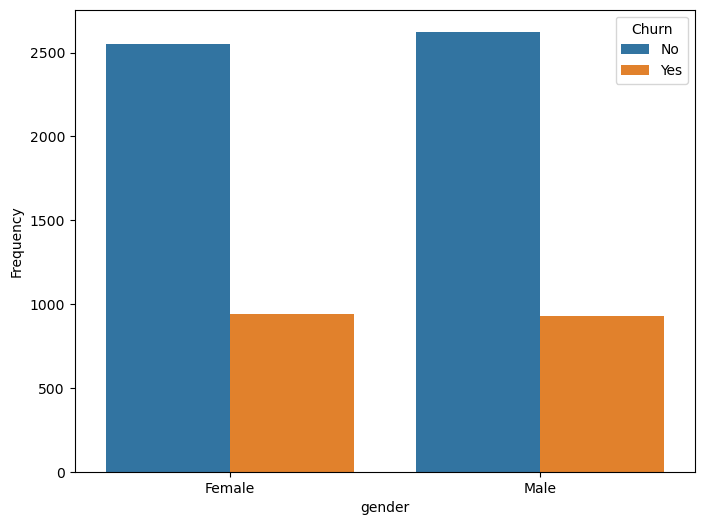

/home/sobaqov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


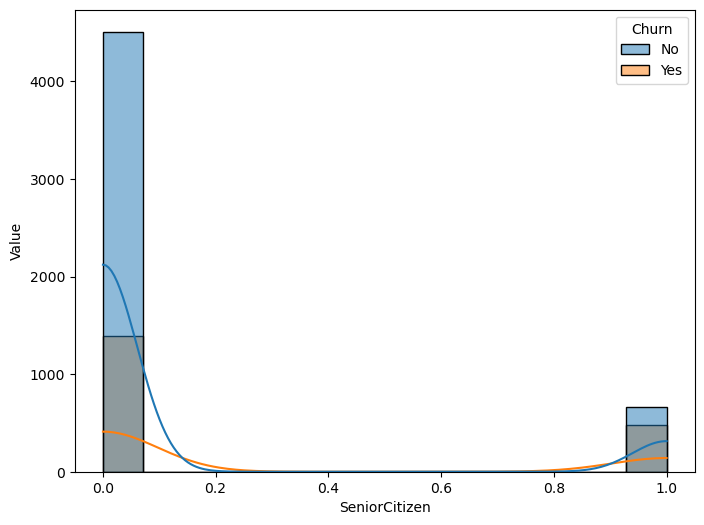

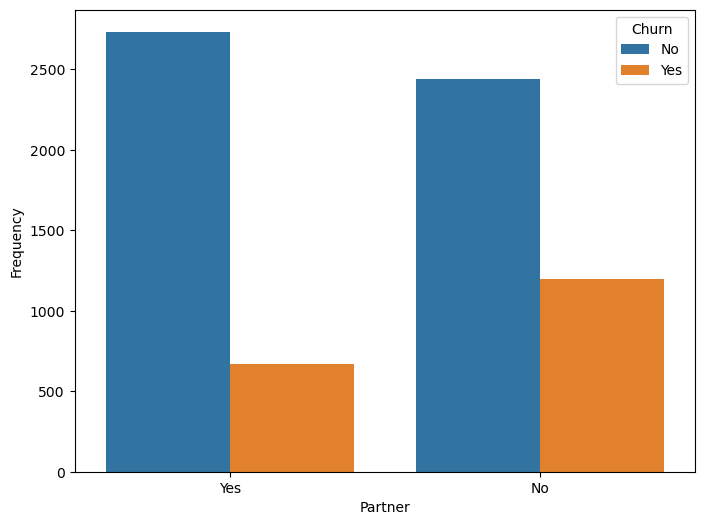

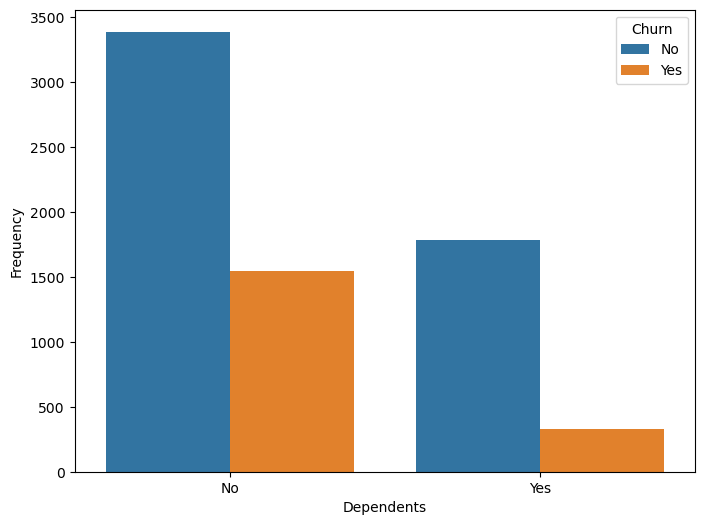

/home/sobaqov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


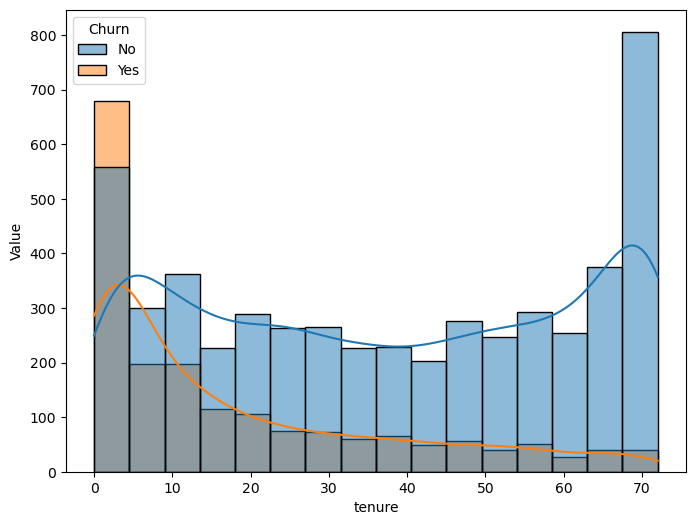

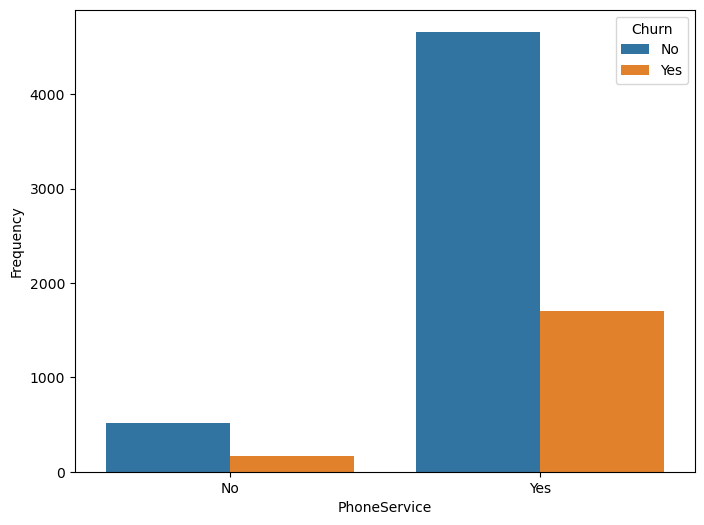

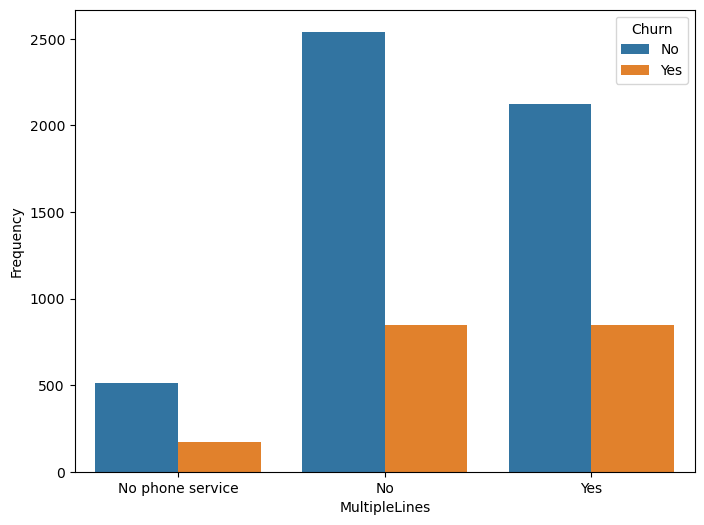

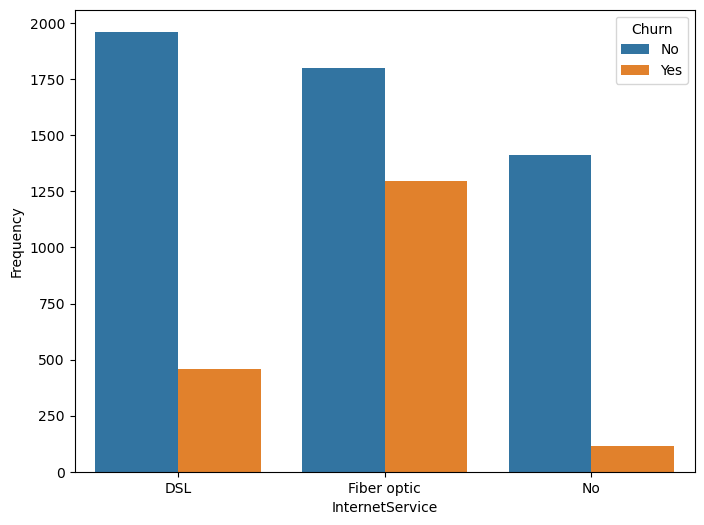

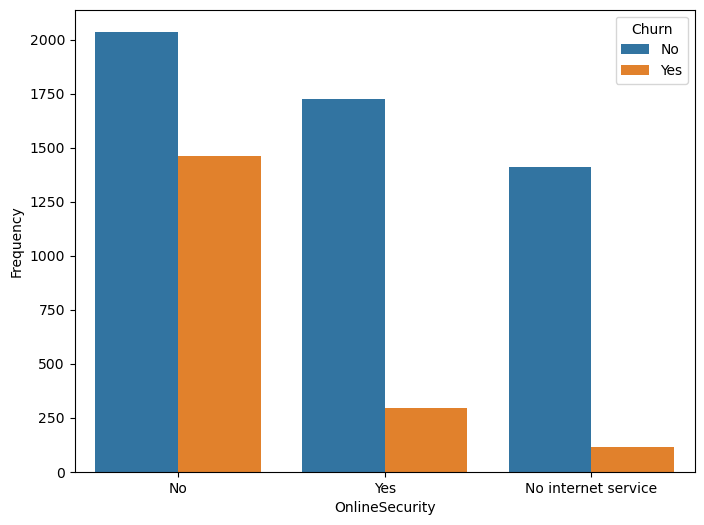

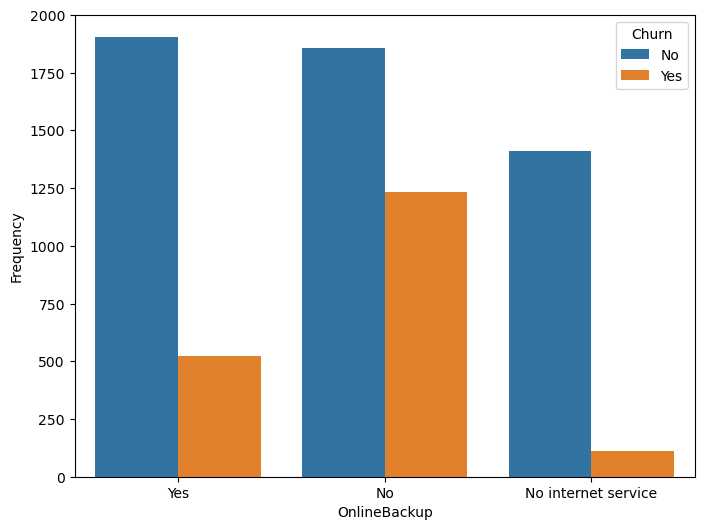

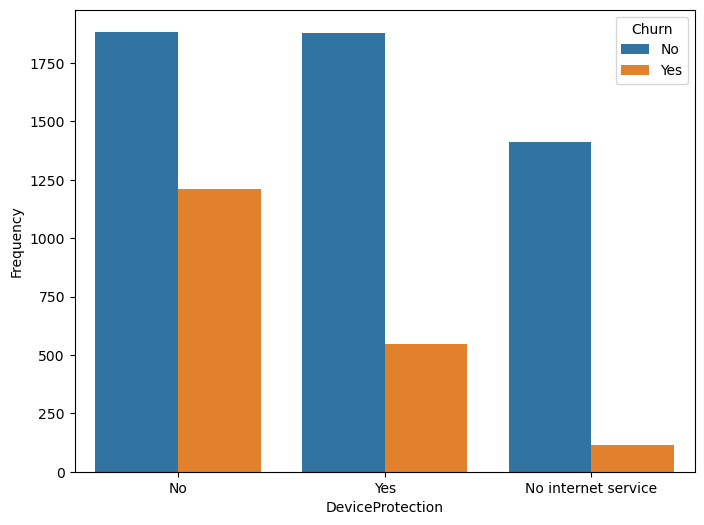

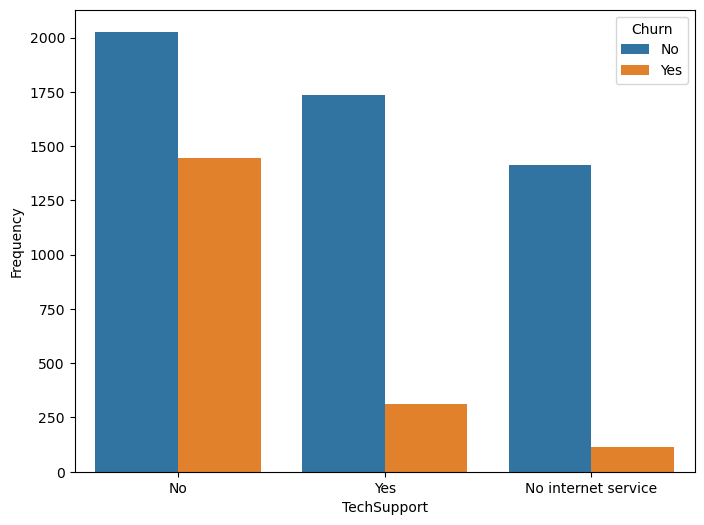

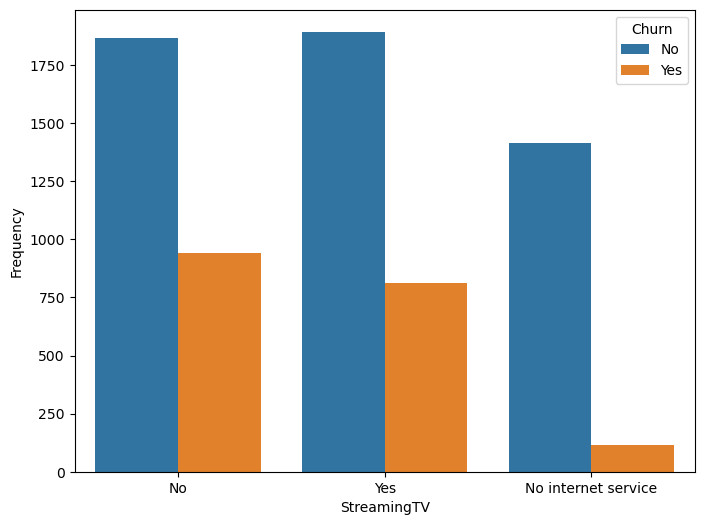

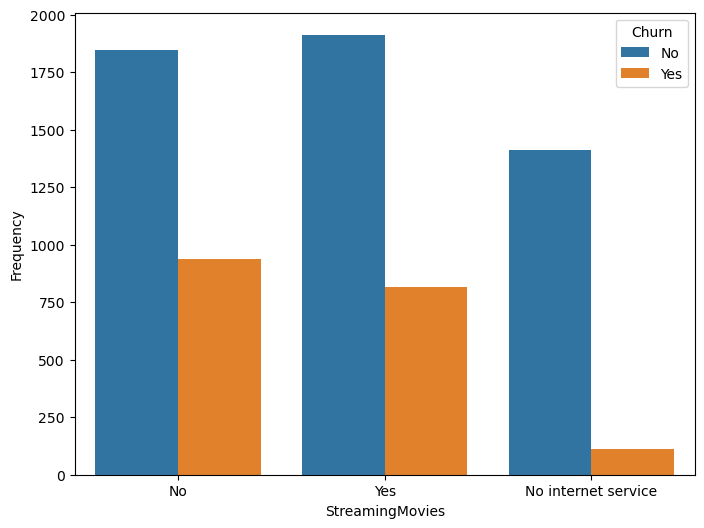

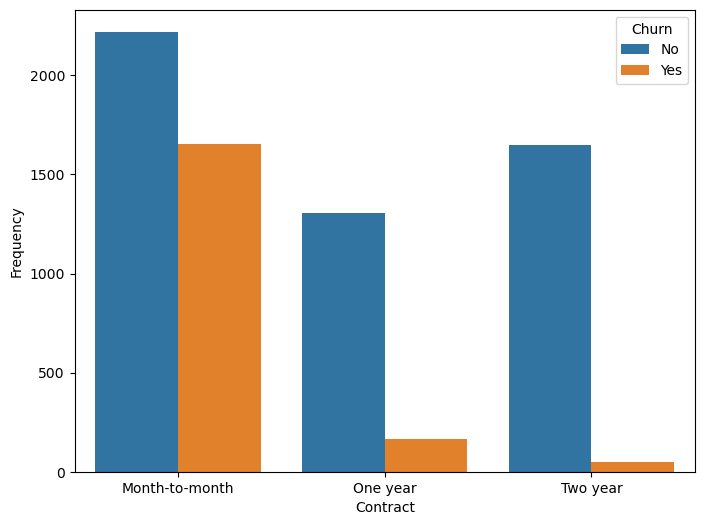

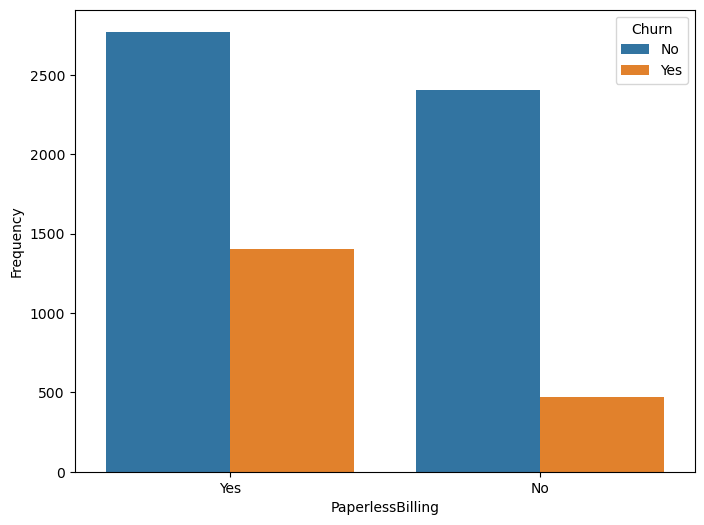

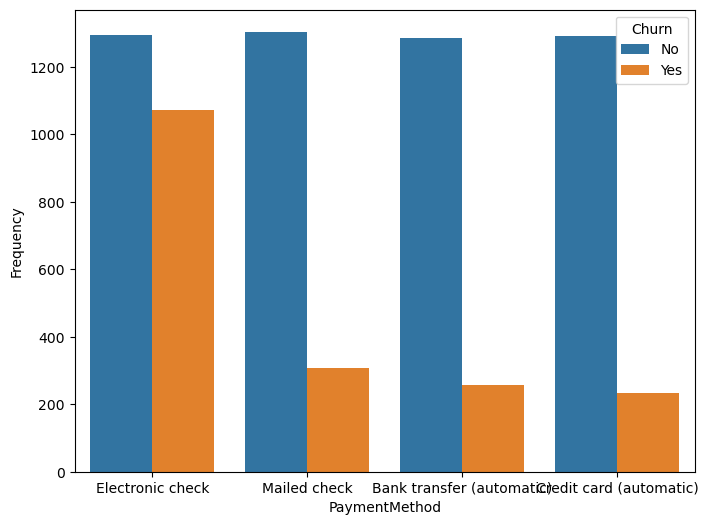

/home/sobaqov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


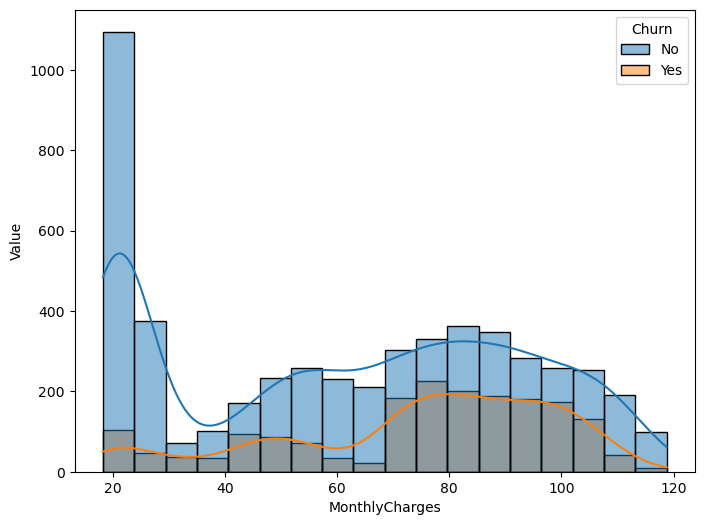

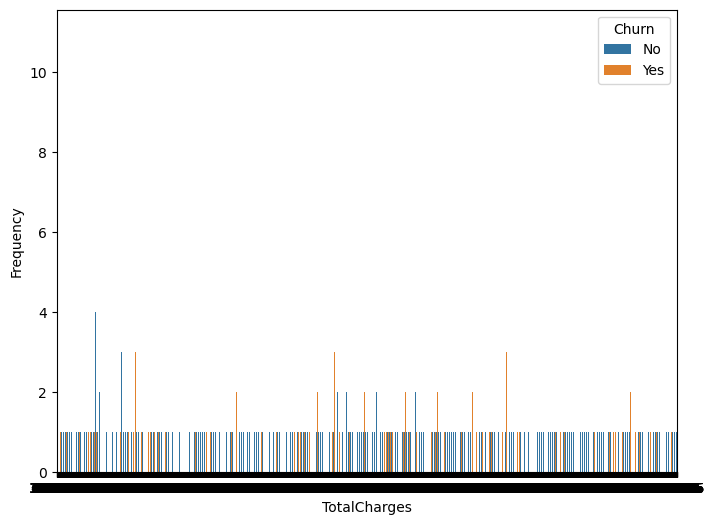

In [56]:
# Uji normalitas data kontinu dengan melakukan plotting setiap kelas yang ada

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_distribusi(dataframe, column_list, class_column):
  for column in column_list:
    if dataframe[column].dtype == 'object':
      plt.figure(figsize=(8, 6))
      sns.countplot(data=dataframe, x=column, hue=class_column)
      plt.xlabel(column)
      plt.ylabel("Frequency")
      plt.show()
    elif (dataframe[column].dtype in ['int64', 'float64']):
      plt.figure(figsize=(8, 6))
      sns.histplot(data=dataframe, x=column, hue=class_column, kde=True)
      plt.xlabel(column)
      plt.ylabel("Value")
      plt.show()

plot_distribusi(df, df.columns[:-1], df.columns[-1])

<Axes: xlabel='Churn', ylabel='count'>

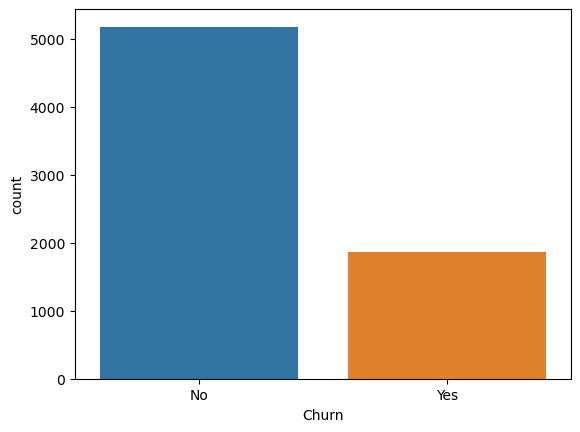

In [57]:
# Cek distribusi target kelas

sns.countplot(data=df, x='Churn')

# Imbalance Handling

Jika dirasa perlu, lakukan imbalance handling menggunakan metode Oversampling, Undersampling, SMOTE, ataupun metode lainnya untuk meratakan distribusi target kelas



In [58]:
from sklearn.impute import SimpleImputer

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
imputer = SimpleImputer(strategy='mean')
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])

In [59]:
y_df = df['Churn']
X_df = df.drop(columns=['Churn'])

In [60]:
from imblearn.over_sampling import SMOTENC, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

continuous_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = []
for col in X_df.columns:
    if col not in continuous_features:
        categorical_features.append(col)

print(f"Continuous features: {continuous_features}")
print(f"Categorical features: {categorical_features}")

smoteng = SMOTENC(categorical_features=categorical_features, random_state=42)

X_resampled, y_resampled = smoteng.fit_resample(X_df, y_df)

Continuous features: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [61]:
X_resampled_df = pd.DataFrame(X_resampled)
y_resampled_df = pd.DataFrame(y_resampled)
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)
df_resampled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


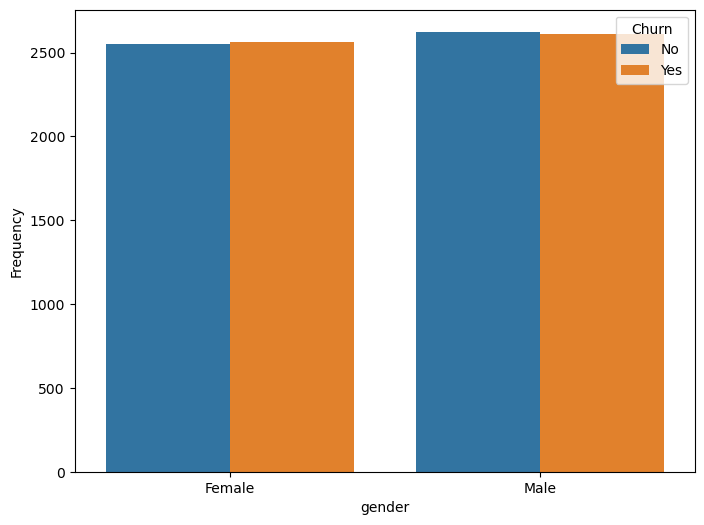

/home/sobaqov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


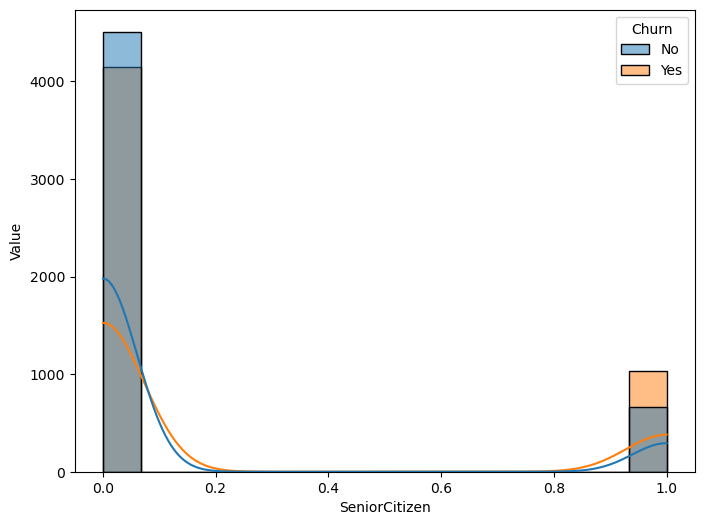

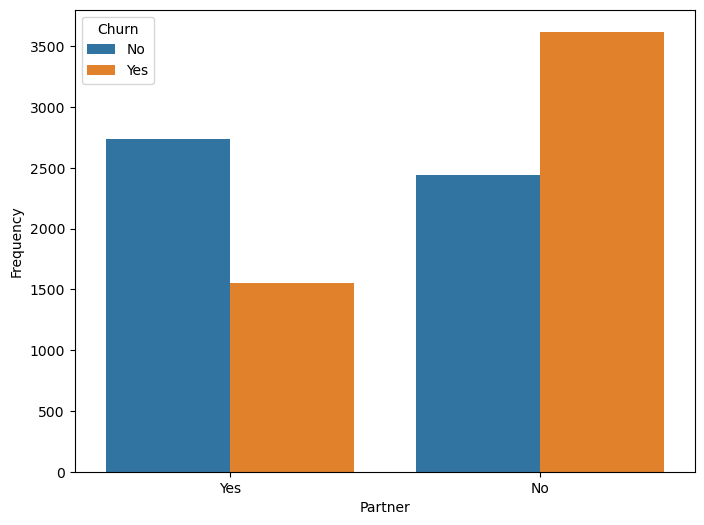

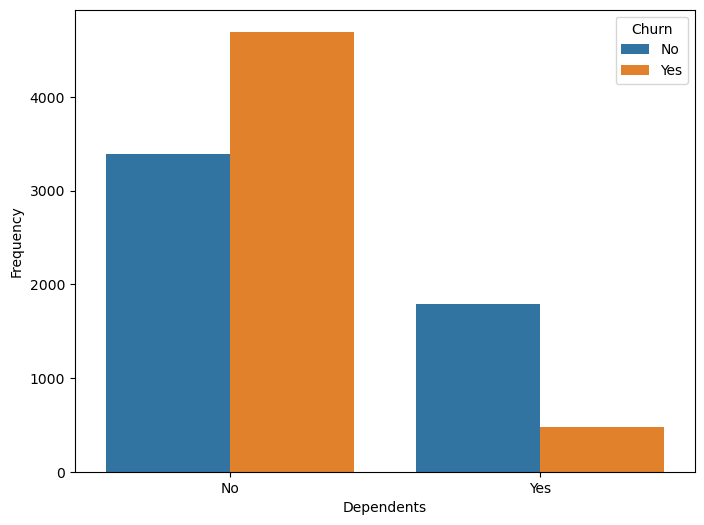

/home/sobaqov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


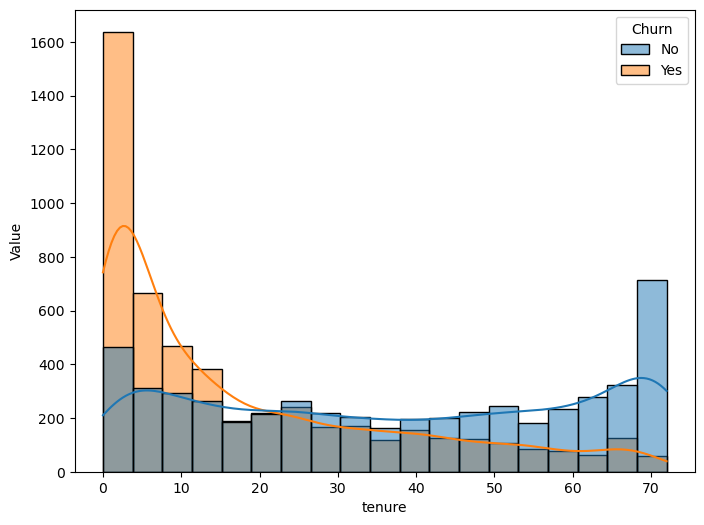

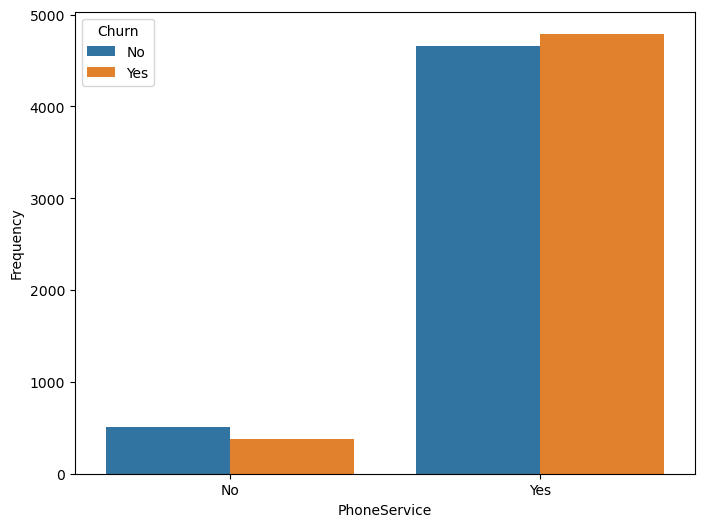

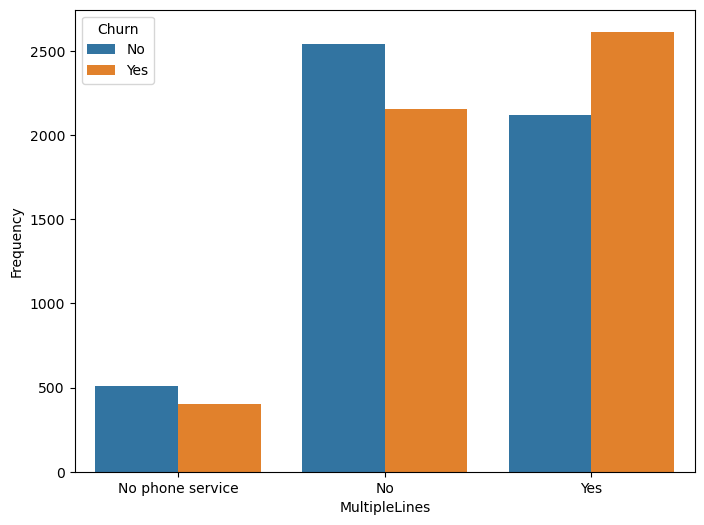

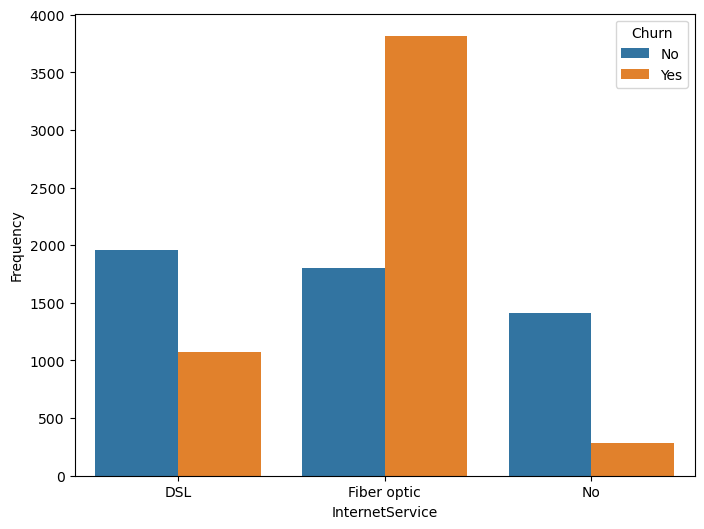

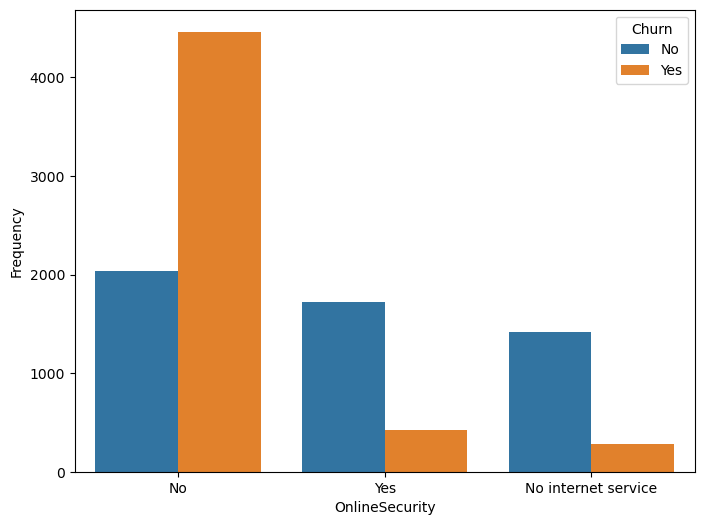

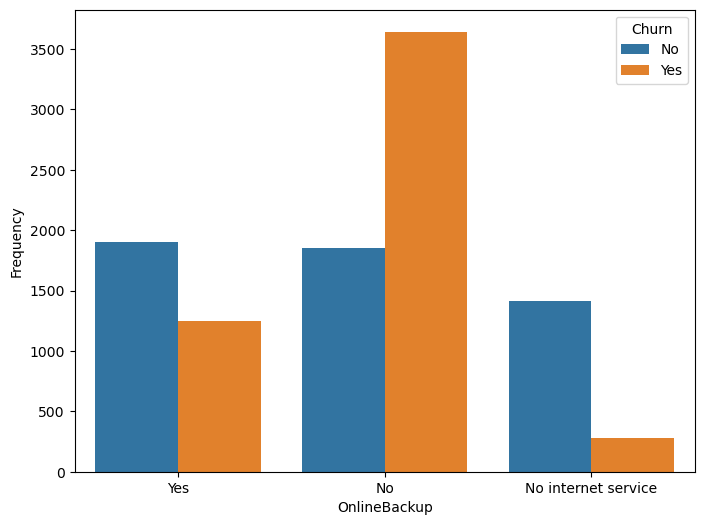

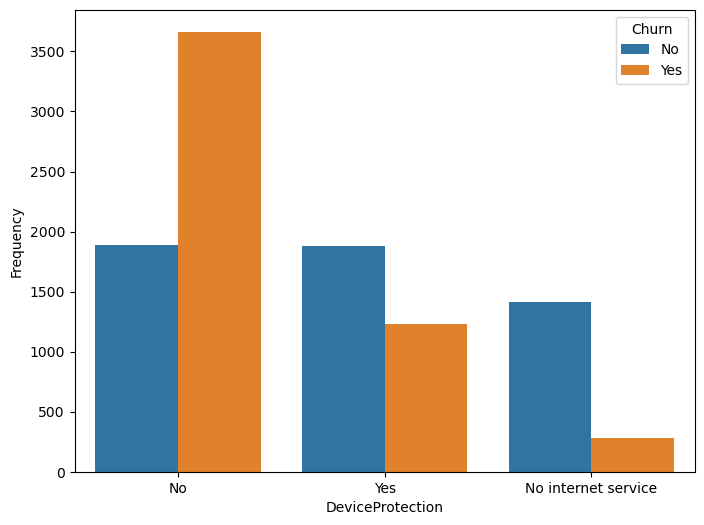

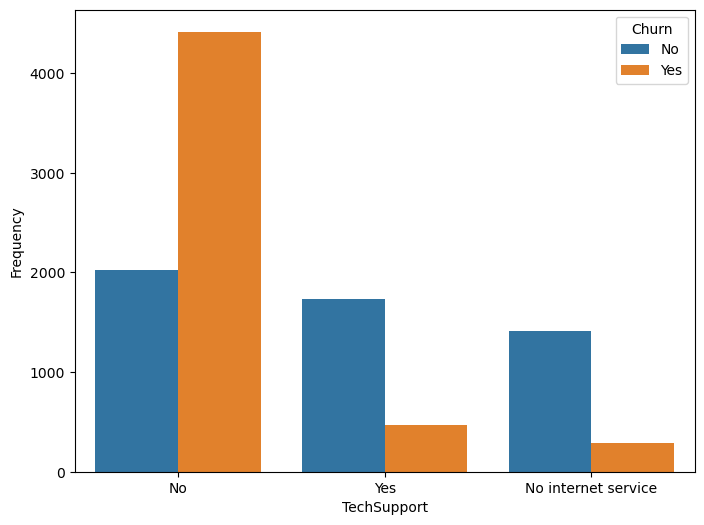

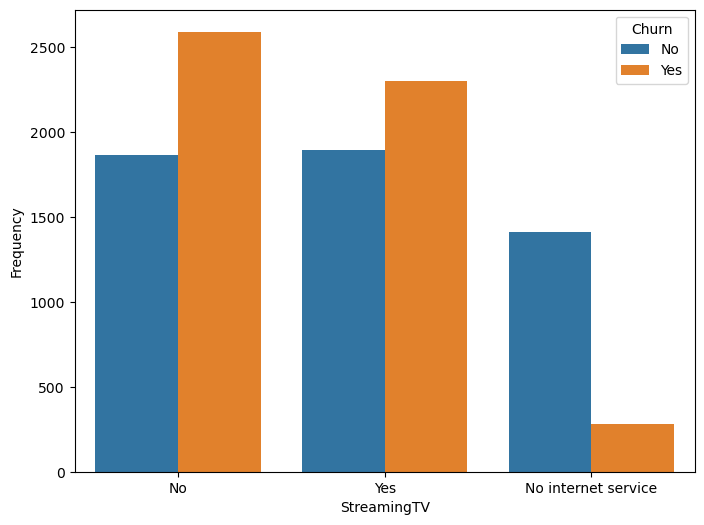

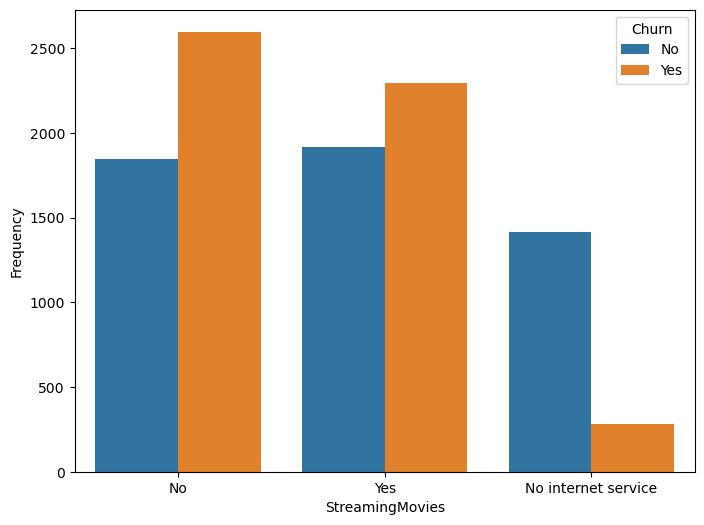

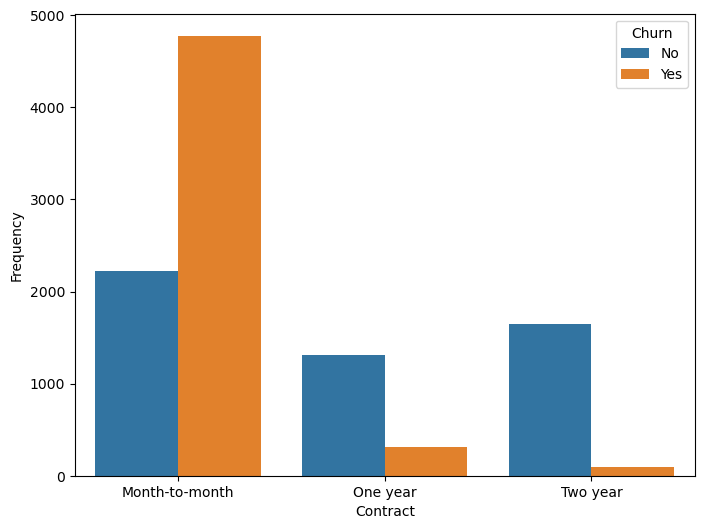

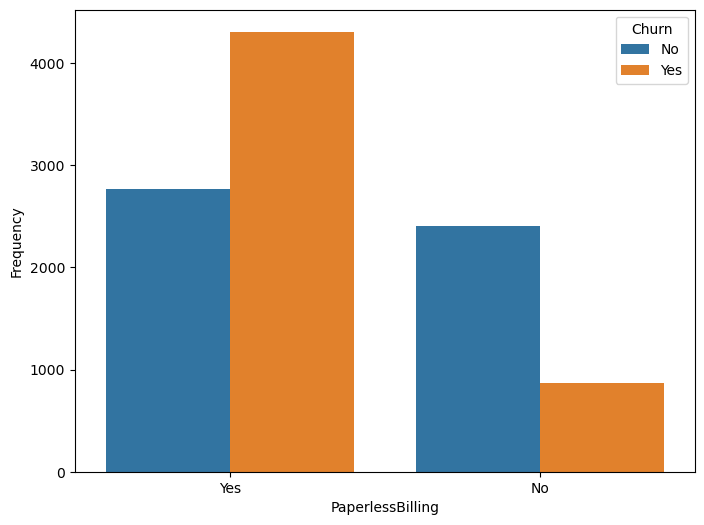

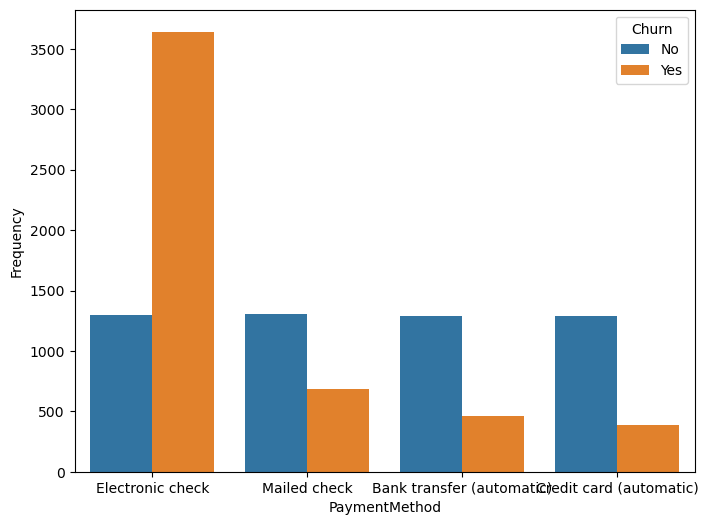

/home/sobaqov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


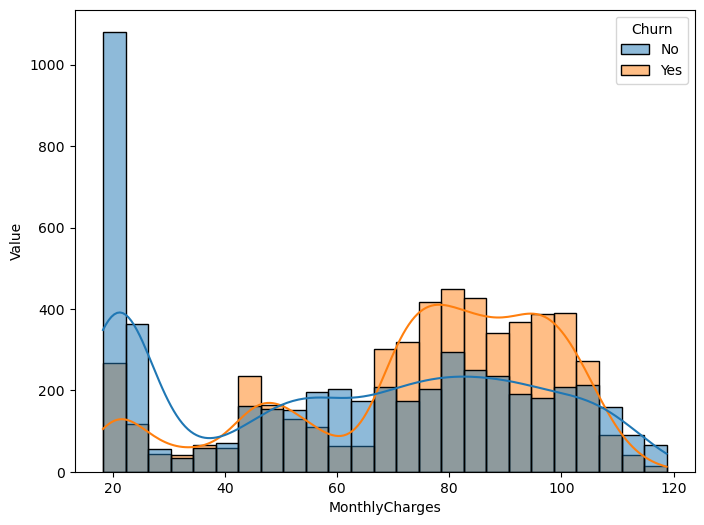

/home/sobaqov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


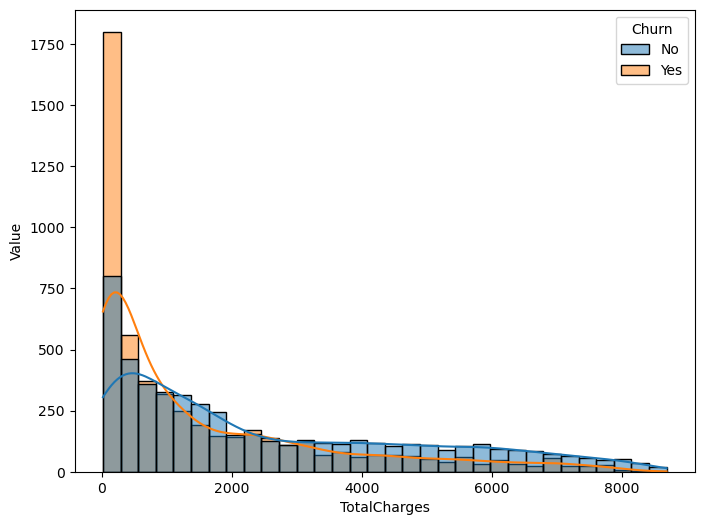

In [62]:
plot_distribusi(df_resampled, df_resampled.columns[:-1], df_resampled.columns[-1])

<Axes: xlabel='Churn', ylabel='count'>

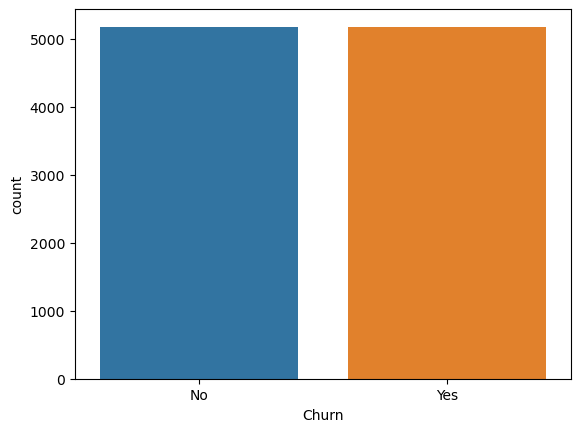

In [66]:
sns.countplot(data=df_resampled, x='Churn')

In [70]:
df_resampled.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Pemrosesan Awal Data Kontinu

## Standard Scaling

In [84]:
def standarisasi(df):
    cont_feats = df.select_dtypes(include=['float64', 'int64']).columns
    std_df = df.copy()
    std_df[cont_feats] = (std_df[cont_feats] - std_df[cont_feats].min()) / (std_df[cont_feats].max() - std_df[cont_feats].min())
    return std_df

std_df = standarisasi(df_resampled)

## Normalization

In [78]:
def normalisasi(df):
  cont_feats = df.select_dtypes(include=['float64', 'int64']).columns
  norm_df = df.copy()
  norm_df[cont_feats] = (norm_df[cont_feats] - norm_df[cont_feats].mean())/norm_df[cont_feats].std()
  return norm_df

norm_df = normalisasi(df_resampled)

# Modeling

Pemodelan dilakukan dengan penggabungan konsep Gaussian Naive Bayes dengan Multinomial Naive Bayes. Tidak diperbolehkan untuk melakukan rekayasa fitur dengan binning.

## Splitting Dataset

In [88]:
from sklearn.model_selection import train_test_split

norm_data_latih, norm_data_uji = train_test_split(norm_df, test_size=0.3, random_state=101)
std_data_latih, std_data_uji = train_test_split(std_df, test_size=0.3, random_state=101)

norm_label_uji = norm_data_uji.pop('Churn')
std_label_uji = std_data_uji.pop('Churn')

In [110]:
std_label_uji.head()

800      No
4215     No
41       No
5461     No
9375    Yes
Name: Churn, dtype: object

## Perhitungan Prior

In [90]:
from collections import Counter

def hitung_prior(list_kelas):
  n = len(list_kelas)
  prior = Counter(list_kelas)
  for key in prior.keys():
    prior[key] = prior[key]/n
  
  return prior

# test hitung_prior
norm_prior = hitung_prior(norm_data_latih[norm_data_latih.columns[-1]])
std_prior = hitung_prior(std_data_latih[std_data_latih.columns[-1]])

print(f"Norm dataset prior: {norm_prior}")
print(f"Std dataset prior: {std_prior}")


Norm dataset prior: Counter({'Yes': 0.5010354825348613, 'No': 0.49896451746513876})
Std dataset prior: Counter({'Yes': 0.5010354825348613, 'No': 0.49896451746513876})


In [94]:
norm_data_latih.dtypes

gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Menghitungan likelihood gaussian dan multinomial

In [186]:
import math

def hitung_mean_std_kelas(input_data):
  feature_list = input_data.select_dtypes(include=['float64']).columns
  class_col = input_data.columns[-1]
  class_set = set(input_data[class_col])
  mean = {}
  std = {}

  for current_feature in feature_list:
    for current_class in class_set:
      mean[(current_class, current_feature)] = input_data.loc[input_data[class_col]==current_class][current_feature].mean()
      std[(current_class, current_feature)] = input_data.loc[input_data[class_col]==current_class][current_feature].std()
  
  return mean, std

def likelihood_gaussian(input_data, current_data):

  mean, std = hitung_mean_std_kelas(input_data)
  class_col = input_data.columns[-1]
  feature_list = input_data.select_dtypes(include=['float64']).columns
  # print("Feature list: ", feature_list)
  class_set = set(input_data[class_col])
  # print("Set class: ", class_set)
  likelihood = {}

  for current_class in class_set:
    # print("Calculating for class: ", current_class)
    product = 1
    for current_feature in feature_list:
      # print("Calculating for feature: ", current_feature)
      current_std = std[(current_class, current_feature)]
      current_mean = mean[(current_class, current_feature)]

      if current_std != 0:
        product *= 1 / (math.sqrt(2 * math.pi * (current_std ** 2))) * math.exp(-1 * ((current_data[current_feature]-current_mean)**2)/(2 * (current_std ** 2)))
      else:
        product *= 0.00001

      # print("Product: ", product)
    likelihood[current_class] = product
  
  return likelihood

def likelihood_multinomial(input_data, current_data):
  class_col = input_data.columns[-1]
  feature_list = input_data.select_dtypes(include=['int64', 'object']).columns[:-1]
  # print("Feature list: ", feature_list)
  class_set = set(input_data[class_col])
  class_count = input_data[class_col].value_counts()
  likelihood = {}

  for current_class in class_set:
    # print("Calculating for class: ", current_class)
    product = 1
    for current_feature in feature_list:
      # print("Calculating for feature: ", current_feature)
      nc = class_count[current_class]
      nc_w = ((input_data[current_feature] == current_data[current_feature]) & (input_data[class_col] == current_class)).sum()
      product *= nc_w / nc
      # print("Product: ", product)
    likelihood[current_class] = product
  return likelihood

In [185]:
# # test 
# test_gaussian_likelihood = likelihood_gaussian(std_data_latih, std_data_uji.iloc[0])
# print(test_gaussian_likelihood)

# test_multinomial_likelihood = likelihood_multinomial(std_data_latih, std_data_uji.iloc[0])
# print(test_multinomial_likelihood)

Feature list:  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
Calculating for class:  No
Calculating for feature:  gender
Product:  0.4869950193691201
Calculating for feature:  Partner
Product:  0.2572422501316132
Calculating for feature:  Dependents
Product:  0.1676986002518209
Calculating for feature:  PhoneService
Product:  0.1510865086939482
Calculating for feature:  MultipleLines
Product:  0.06162189092830096
Calculating for feature:  InternetService
Product:  0.021620519562004878
Calculating for feature:  OnlineSecurity
Product:  0.00843523314400301
Calculating for feature:  OnlineBackup
Product:  0.0030225863092097115
Calculating for feature:  DeviceProtection
Product:  0.0011156973260890303
Calculating for feature:  TechSupport
Product:  0

## Training Naive Bayes

In [187]:
def training_naive_bayes(data_latih):

  class_col = data_latih.columns[-1]
  class_set = set(data_latih[class_col])
  prior = hitung_prior(data_latih[class_col])
  mean, std = hitung_mean_std_kelas(data_latih)

  model = {}
  model['prior'] = prior
  model['mean'] = mean
  model['std'] = std
  model['class_set'] = class_set
  
  return model

## Testing Naive Bayes

In [188]:
print(std_data_uji.shape[0])

3105


In [195]:
def testing_naive_bayes(model, data_latih, data_uji):
  prior = model['prior']
  class_set = model['class_set']

  preds = []

  for i in range(data_uji.shape[0]):
    current_data_uji = data_uji.iloc[i]
    likelihood_gaussian_values = likelihood_gaussian(data_latih, current_data_uji)
    # print("likelihood_gaussian_values: ", likelihood_gaussian_values)
    likelihood_multinomial_values = likelihood_multinomial(data_latih, current_data_uji)
    # print("likelihood_multinomial_values: ", likelihood_multinomial_values)
    
    posterior = {}

    for current_class in class_set:
      current_gaussian = likelihood_gaussian_values[current_class]
      current_multinomial = likelihood_multinomial_values[current_class]
      current_prior = prior[current_class]

      posterior[current_class] = current_gaussian * current_multinomial * current_prior
    
    prediction = max(posterior, key=posterior.get)
    preds.append(prediction)
    
  return preds

In [196]:
print(std_data_uji.iloc[0])

gender                               Female
SeniorCitizen                           1.0
Partner                                 Yes
Dependents                               No
tenure                             0.972222
PhoneService                            Yes
MultipleLines                           Yes
InternetService                 Fiber optic
OnlineSecurity                           No
OnlineBackup                             No
DeviceProtection                         No
TechSupport                              No
StreamingTV                              No
StreamingMovies                          No
Contract                           Two year
PaperlessBilling                        Yes
PaymentMethod       Credit card (automatic)
MonthlyCharges                     0.571144
TotalCharges                       0.622271
Name: 800, dtype: object


# Analisis Klasifikasi

## Dataset Standarisasi

### Training Naive Bayes

In [197]:
model_std = training_naive_bayes(std_data_latih)
print(model_std)

{'prior': Counter({'Yes': 0.5010354825348613, 'No': 0.49896451746513876}), 'mean': {('No', 'SeniorCitizen'): 0.12728278915329275, ('Yes', 'SeniorCitizen'): 0.2006062276109121, ('No', 'tenure'): 0.5229393408350244, ('Yes', 'tenure'): 0.24830838002510638, ('No', 'MonthlyCharges'): 0.4280571409691994, ('Yes', 'MonthlyCharges'): 0.5650489009799554, ('No', 'TotalCharges'): 0.2931788685961106, ('Yes', 'TotalCharges'): 0.1772032091946378}, 'std': {('No', 'SeniorCitizen'): 0.3333356053481684, ('Yes', 'SeniorCitizen'): 0.4005091392774652, ('No', 'tenure'): 0.33610817917422414, ('Yes', 'tenure'): 0.26567648655475035, ('No', 'MonthlyCharges'): 0.30887054550834203, ('Yes', 'MonthlyCharges'): 0.23907250960908946, ('No', 'TotalCharges'): 0.26916217263889414, ('Yes', 'TotalCharges'): 0.21748367840362595}, 'class_set': {'No', 'Yes'}}


### Evaluasi Prediksi

In [199]:
prediksi_total_std = testing_naive_bayes(model_std, std_data_latih, std_data_uji)
print("Total prediksi benar: ",sum(prediksi_total_std==std_label_uji))

Total prediksi benar:  2433


## Dataset Normalisasi

### Training Naive Bayes

In [200]:
model_norm = training_naive_bayes(norm_data_latih)
print(model_norm)

{'prior': Counter({'Yes': 0.5010354825348613, 'No': 0.49896451746513876}), 'mean': {('No', 'SeniorCitizen'): -0.0991399589524184, ('Yes', 'SeniorCitizen'): 0.09887781779265682, ('No', 'tenure'): 0.41707736586964844, ('Yes', 'tenure'): -0.4095760647277764, ('No', 'MonthlyCharges'): -0.24071161470416164, ('Yes', 'MonthlyCharges'): 0.24017593664600229, ('No', 'TotalCharges'): 0.233343381791962, ('Yes', 'TotalCharges'): -0.2279838767696813}, 'std': {('No', 'SeniorCitizen'): 0.9002084036084615, ('Yes', 'SeniorCitizen'): 1.0816177063442995, ('No', 'tenure'): 1.01170304523142, ('Yes', 'tenure'): 0.7996999988343019, ('No', 'MonthlyCharges'): 1.0842403973934924, ('Yes', 'MonthlyCharges'): 0.8392256127815767, ('No', 'TotalCharges'): 1.0706716206902633, ('Yes', 'TotalCharges'): 0.8651052268867097}, 'class_set': {'No', 'Yes'}}


### Evaluasi Prediksi

In [201]:
prediksi_total_norm = testing_naive_bayes(model_norm, norm_data_latih, norm_data_uji)
print("Total prediksi benar: ",sum(prediksi_total_norm==norm_label_uji))

Total prediksi benar:  2433


# Kesimpulan

Soal

1. Apakah data kontinu dalam dataset menunjukkan kecenderungan distribusi normal?

2. Jika anda melakukan imbalance handling, mengapa hal tersebut perlu dilakukan?

3. Dalam hasil percobaan diatas, apakah efek dari standarisasi/normalisasi yang dilakukan terhadap data?

4. Dalam kasus yang diberikan, apakah model hybrid multinomial dan gaussian sudah optimal? Pengembangan apa saja yang dapat dilakukan?

Jawaban

1. Tidak, data kontinu seperti Tenure, MonthlyCharges dan juga TotalCharges tidak mengikuti pola distribusi normal yang ditandai tidak adanya pola bell-shape pada KDE.

2. Dilakukan imbalance handling dengan menggunakan teknik SMOTENC dikarenakan jumlah data dengan klasifikasi 'No' sangat dominan jika dibandingkan dengan 'Yes'. SMOTENC dipilih dikarenakan sifatnya yang mampu mengenerate data kelas minor dengan variasi (dikarenakan data duplikat tidak mampu memberikan informasi tambahan pada model) tanpa menghilangkan informasi kelas mayor.

3. Efek standarisasi/normalisasi secara teoretikal sama-sama digunakan untuk meningkatkan kemampuan generalisasi model dengan menghadirkan data yang lebih konvergen dengan skala yang konsisten antar fiturnya. Standarisasi dengan menggunakan z-Score seharusnya mampu memberikan performa yang lebih baik untuk distance-based algorithm seperti KNN dikarenakan standarisasi me-retent distance information antara data points. Akan tetapi, pada praktikum ini didapatkan akurasi serupa antara penggunaan standarisasi/normalisasi.

4. Dalam kasus ini, digunakan model hybrid multnomial-gaussian untuk dataset Bank Churn. Secara garis besar, penggunaan tipe data untuk mengklasifikasikan feature dengan likelihood Gaussian dan Multinomial sudah benar. Akan tetapi, masih terdapat kemungkinan optimalisasi algoritma seperti feature selection untuk efisiensi performa komputasi serta penggunaan teknik preprocessing yang lebih baik dikarenakan saat ini masih digunakan teknik imputasi dan imbalance handling yang sederhana. Selain itu, imbalance handling mungkin bisa dilakukan hanya pada training data untuk menghindari data leakage.